In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import glob as glob
from scipy.optimize import curve_fit
import os

In [39]:
folder = "Dag 2\\Split Mg data"
names = glob.glob(os.path.join(folder,'*.txt'))
files = []
for i in names[0:]:
    k = np.loadtxt(i)
    
    files.append(k)
#files[0]

In [40]:
# rciproc fit
a = 22.686360626124895
b = 0.004380389246954719
ae, be = 8.26845800e-01, 7.70049307e-04
# chi2: 24.685075717678107  ---> p: 0.9999417974035777
# a/x+b
t = 0.73971712
y = 0.3785
te = 9.9e-7
ye =1.4e-3
true_counts = []

for i in files:
    energy = i[0][2:]*t + y
    energyerror = np.sqrt((i[0][2:]*te)**2+ye**2)
    factor = a/energy + b
    factorerror = factor*np.sqrt((np.sqrt((ae/a)**2+(energyerror/energy)**2)*a/energy)**2+be**2)
    counts = i[1][2:]
    real_count = counts/factor
    realcounterror = real_count*np.sqrt((counts**0.5/counts)**2+(factorerror/factor)**2)
    errors = realcounterror
    true_counts.append([energy, real_count, errors])



In [41]:
def funlin(t, a, b, c):
    return np.exp(-t*a)*b +c
def fit(counts, a, b, k, name, yler):
    xhelp = np.linspace(0.00145053, 69536.05847064, len(true_counts))
    #yler = np.array(counts)*0.01
    popt, pcov = curve_fit(funlin, xhelp, counts, p0=[a, b, k], sigma=yler, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))
    print('parametre',popt)
    print('usikkerheder:', perr)
    chmin = np.sum(((counts - funlin(xhelp, *popt))/yler) ** 2)
    print('chi2:', chmin, ' ---> p:', ss.chi2.cdf(chmin, 3))
    plt.scatter(xhelp, counts)
    plt.plot(xhelp, funlin(xhelp, *popt), color='r')

    plt.xlabel('Time (s)')
    plt.ylabel('Counts (Nan)')
    plt.title('Counts for {} eV'.format(name))
    plt.show()
    return popt, perr

parametre [7.29575952e-05 1.20398380e+07 7.83782181e+05]
usikkerheder: [6.41687057e-08 7.21879660e+03 1.47390115e+03]
chi2: 157.77540045663224  ---> p: 1.0


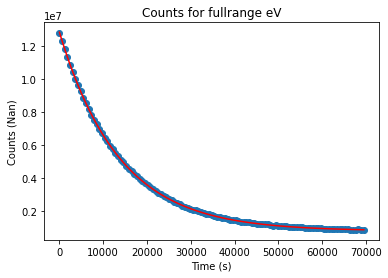

In [42]:

xhelp = np.linspace(600, 69536.05847064, len(true_counts))
counts_fullrange = []
error = []
for i in true_counts:
    counts_fullrange.append(np.sum(i[1]))
    error.append(np.sqrt(np.sum(i[2]**2)))

res = fit(counts_fullrange, 0.00001, 10000000, 1000000, 'fullrange', error)

In [43]:
halflife = (np.log(2)/res[0][0])/3600
halfliferr = np.log(2)/3600*res[1][0]
print(halflife, halfliferr)

2.639079356937367 1.2355099279942804e-11


In [44]:
energies = [848, 2117, 1240, 2662, 1813, 2965, 3122, 2116, 1036, 3377, 2526, 2582]
width = [25, 30, 20, 40, 40, 40, 5, 40, 5, 60, 40, 5]
total_counts = [[], [], [], [], [], [], [], [], [], [], [], []]
total_counts_err = [[], [], [], [], [], [], [], [], [], [], [], []]
for i in true_counts:
    for j in range(len(energies)):
        idx = np.where((i[0] >= (energies[j]-width[j]/2)) & (i[0] <= (energies[j]+width[j]/2)))
        total_counts[j].append( np.sum(i[1][idx]) )
        total_counts_err[j].append( np.sum(i[2][idx]**2) )
        
total_counts = np.array(total_counts)


In [45]:
xhelp = np.linspace(0.00145053, 69536.05847064, len(total_counts[0]))



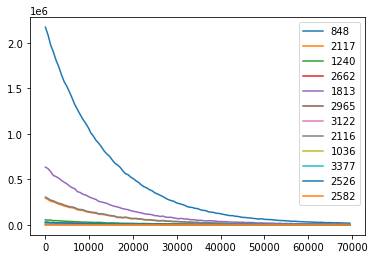

In [46]:

for i in range(len(total_counts)):
    plt.plot(xhelp, total_counts[i], label='{}'.format(energies[i]))
plt.legend()

####################################################################################################
parametre [7.33974794e-05 2.16700298e+06 6.27168717e+03]
usikkerheder: [3.07497866e-04 1.58148076e+07 3.67084722e+05]
chi2: 3.882316676021838e-05  ---> p: 6.433542653969911e-08


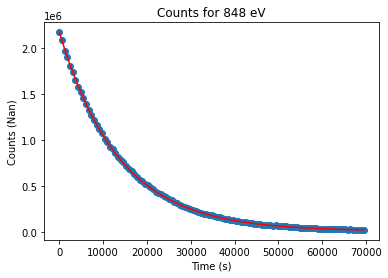

####################################################################################################
parametre [7.33245334e-05 2.85108813e+05 2.66795319e+03]
usikkerheder: [7.22033802e-04 4.45543113e+06 1.35692462e+05]
chi2: 0.00010695863028654634  ---> p: 2.941904837621293e-07


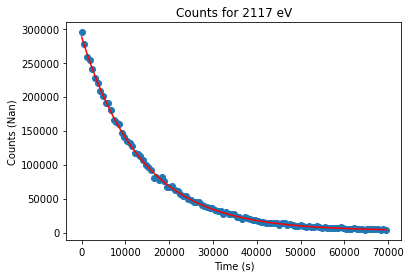

####################################################################################################
parametre [7.29847784e-05 5.18135672e+04 4.24430044e+03]
usikkerheder: [8.67730554e-04 6.63374296e+05 5.50386385e+04]
chi2: 0.0003163357746216397  ---> p: 1.4962358500173148e-06


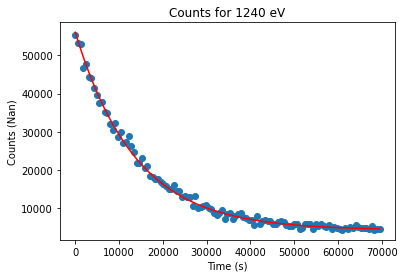

####################################################################################################
parametre [7.39916881e-05 2.41634186e+04 2.36030633e+03]
usikkerheder: [1.67090964e-03 5.79242392e+05 4.93712466e+04]
chi2: 0.00035316506861244023  ---> p: 1.7649784442205208e-06


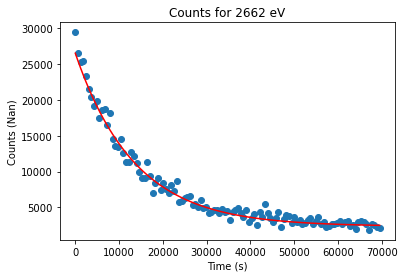

####################################################################################################
parametre [7.34837158e-05 6.35527208e+05 3.96974791e+03]
usikkerheder: [6.12528618e-04 8.73093790e+06 2.37016230e+05]
chi2: 6.888847287174394e-05  ---> p: 1.520651404713663e-07


C:\Users\eriko\AppData\Local\Temp\ipykernel_8884\899667398.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-t*a)*b +c
C:\Users\eriko\AppData\Local\Temp\ipykernel_8884\899667398.py:2: RuntimeWarning: overflow encountered in multiply
  return np.exp(-t*a)*b +c


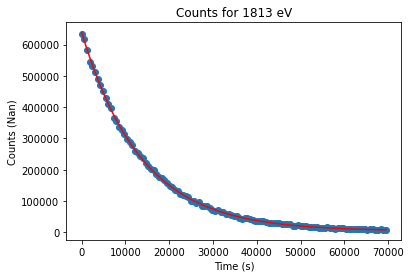

####################################################################################################
parametre [7.72942697e-05 1.00760405e+04 2.18253245e+03]
usikkerheder: [2.72703711e-03 3.09360040e+05 4.01689084e+04]
chi2: 0.0004927343544773564  ---> p: 2.9085321921611388e-06


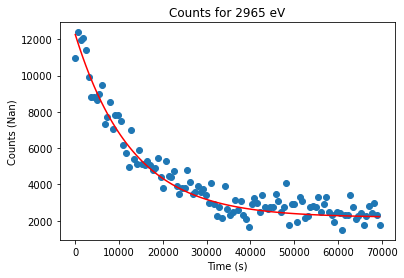

####################################################################################################


C:\Users\eriko\anaconda3\lib\site-packages\scipy\optimize\minpack.py:756: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [49]:


lambd = []
lambderr = []
n0 = []
n0err = []
alis = [0.00007, 0.00007, 0.00007, 0.00007, 0.00007, 0.00007, 0.00007,0.00007,0.00007, 0.00007, 0.00007, 0.00007]
blis = [10000, 7000, 100, 10000, 100, 100, 100 ,100, 100, 100, 100, 100]
clis = [600, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
for i in range(len(total_counts)):
    print('#'*100)
    params, errs = fit(total_counts[i], alis[i], blis[i], clis[i], energies[i], total_counts_err[i])
    if i in [0,1,2,3,4,5,7,9,10]:
        lambd.append(params[0])
        n0.append(params[1])
        lambderr.append(errs[0])
        n0err.append(errs[1])

In [52]:
life = np.array(lambd)
lerr = np.array(lambderr)

print('Lifetimes: ', (1/life)/3600, '\nErrors: ', lerr/(lerr**2*3600),'\nMean lifettime: ', np.mean((1/life)/3600), '\nMean error', np.mean(np.sqrt(np.square(lerr/(lerr**2*3600)))) )

print('Halflives: ', (np.log(2)/life)/3600,'\nMean halftime: ', np.mean((np.log(2)/life)/3600))

print(np.sum(n0))

Lifetimes:  [3.78456835 3.78833339 3.80596864 3.75417543 3.780127   3.59376935] 
Errors:  [0.90334864 0.38471575 0.32011985 0.16624345 0.45349355 0.10186065] 
Mean lifettime:  3.7511570271364203 
Mean error 0.3882969818955095
Halflives:  [2.62326288 2.62587261 2.63809643 2.60219612 2.62018437 2.49101109] 
Mean halftime:  2.600103917197236
3173692.02288364
